### An example of a Univariate Linear Regression
This demo will demonstrate how to do a univariate linear regression and how to measure its goodness-for-fit.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [3]:
data = pd.read_csv('./demo-datasets/sat_gpa.csv')

In [4]:
data.head()

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


In [5]:
data.describe()

,SAT,GPA
count,84.000000,84.000000
mean,1845.273810,3.330238
std,104.530661,0.271617
min,1634.000000,2.400000
25%,1772.000000,3.190000
50%,1846.000000,3.380000
75%,1934.000000,3.502500
max,2050.000000,3.810000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
SAT    84 non-null int64
GPA    84 non-null float64
dtypes: float64(1), int64(1)
memory usage: 1.4 KB


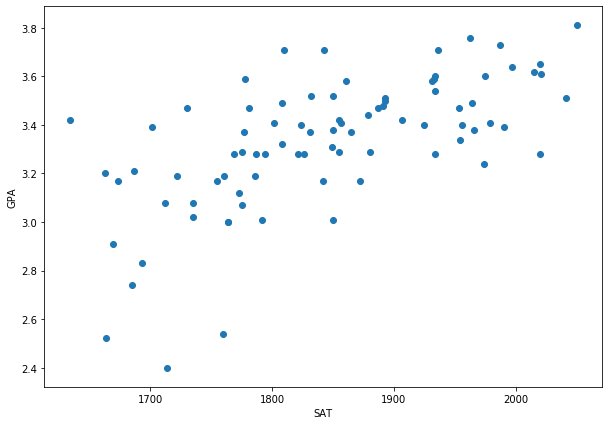

In [7]:
plt.figure(figsize=(10, 7))
plt.scatter('SAT', 'GPA', data=data)
plt.xlabel('SAT')
plt.ylabel('GPA')
plt.show()

By looking at the scatter plot, we definitely see that there is a some relationship between SAT score and GPA score. Let's run a linear regression and see how well does SAT explain the variance of GPA.

In the regression, SAT will be independent variable, and GPA will be dependent variables.

In [8]:
lr = LinearRegression()

We need to reshape our 1D arrays into 2D arrays with _n_ x _m_ format, where _n_ is the number of rows and _m_ is the number of columns. 

In [9]:
x = data['SAT'].values.reshape(-1, 1)

In [10]:
y = data['GPA'].values.reshape(-1, 1)

In [11]:
lr.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

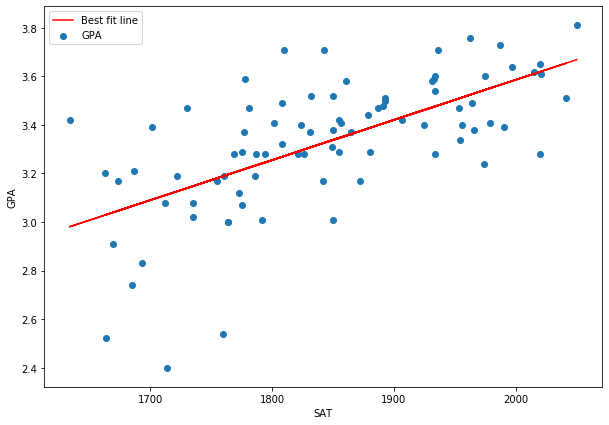

In [12]:
plt.figure(figsize=(10, 7))

# draw a scatter plot of observed values
plt.scatter('SAT', 'GPA', data=data)
plt.xlabel('SAT')
plt.ylabel('GPA')

# draw a regression line
plt.plot(x, lr.predict(x), c='red')
plt.legend(['Best fit line', 'GPA'])
plt.show()

In [13]:
print('Best fit line: y = ' + str(round(lr.intercept_[0], 3)) + ' + ' + str(round(lr.coef_[0][0], 5)) + 'x')

Best fit line: y = 0.275 + 0.00166x


Now let's check how well does SAT score explain the variance of GPA.

$R^2$ (coefficient of determination) is a goodness-of-fit measure for linear regression models. This statistic indicates the percentage of the variance in the dependent variable that the independent variables explain collectively.

In [27]:
print('R-squared:', round(lr.score(x, y), 3))

R-squared: 0.406


SAT score explains 40.6 percent of GPA's variance.